In [5]:
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import io

In [50]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv
User uploaded file "heart_failure_clinical_records_dataset.csv" with length 12239 bytes


In [51]:
df = pd.read_csv(io.StringIO(uploaded['heart_failure_clinical_records_dataset.csv'].decode('utf-8')))
df = df.fillna(df.mean())
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


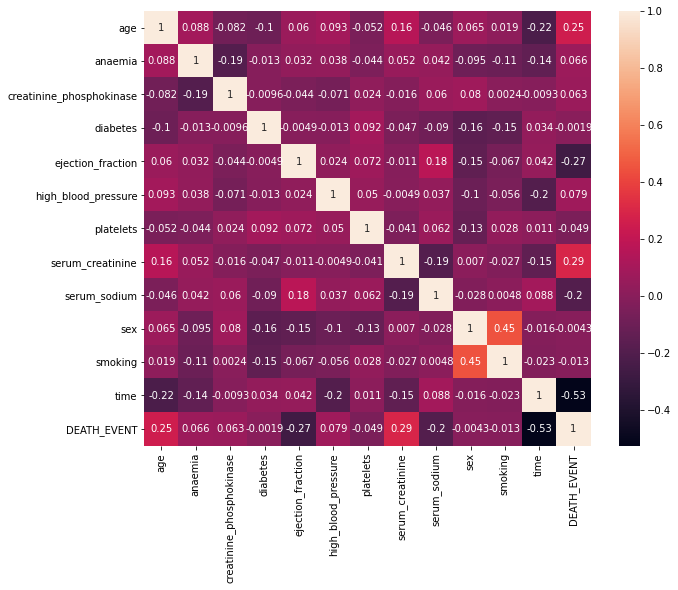

In [52]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retain

<Figure size 432x288 with 0 Axes>

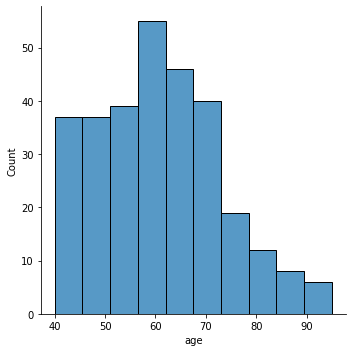

<Figure size 432x288 with 0 Axes>

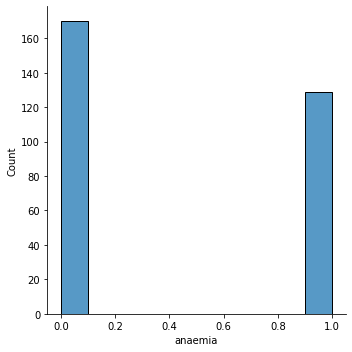

<Figure size 432x288 with 0 Axes>

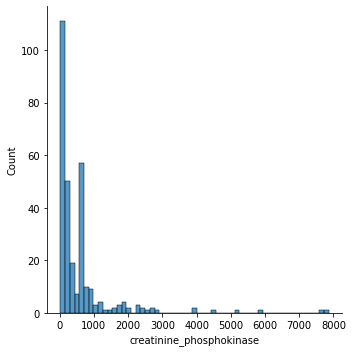

<Figure size 432x288 with 0 Axes>

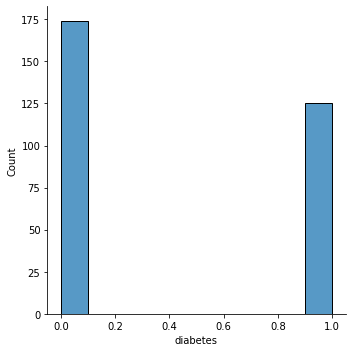

<Figure size 432x288 with 0 Axes>

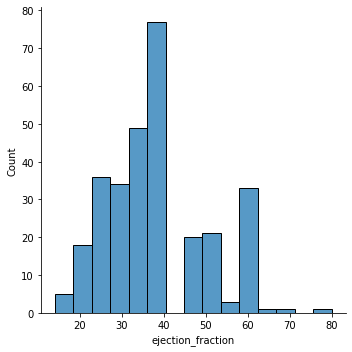

<Figure size 432x288 with 0 Axes>

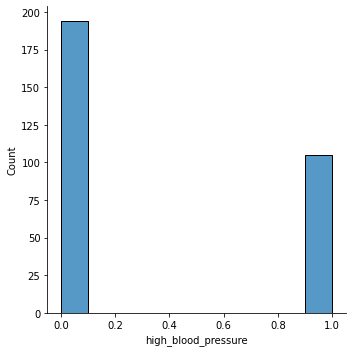

<Figure size 432x288 with 0 Axes>

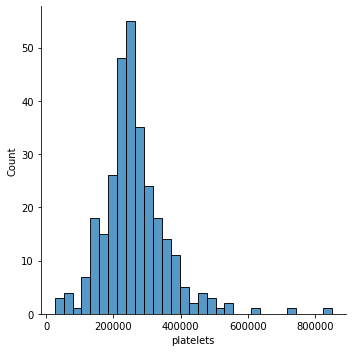

<Figure size 432x288 with 0 Axes>

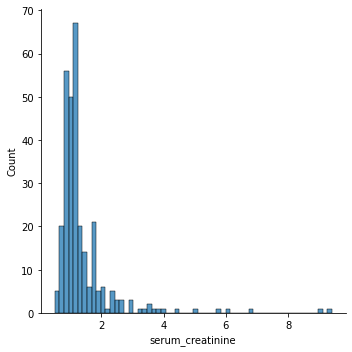

<Figure size 432x288 with 0 Axes>

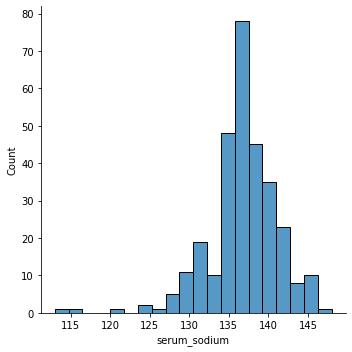

<Figure size 432x288 with 0 Axes>

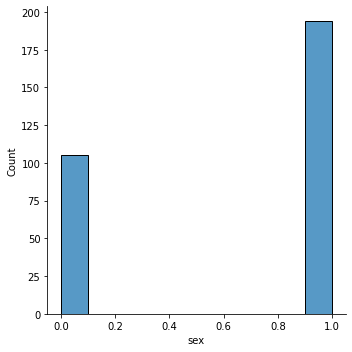

<Figure size 432x288 with 0 Axes>

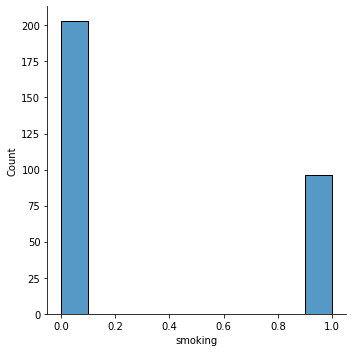

<Figure size 432x288 with 0 Axes>

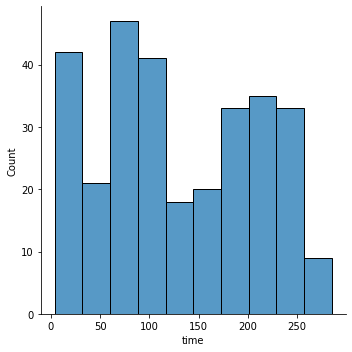

In [53]:
feature_names = list(df.columns)
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.displot(df[feature_names[i]])

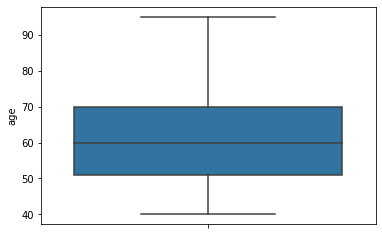

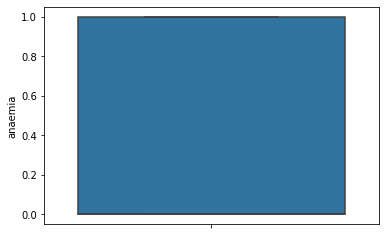

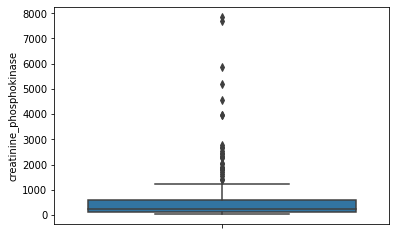

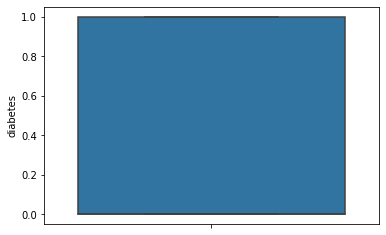

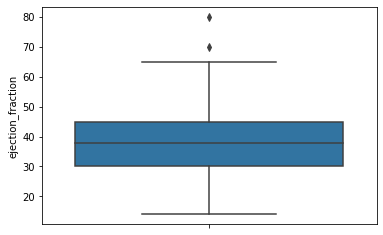

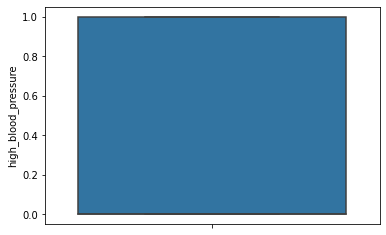

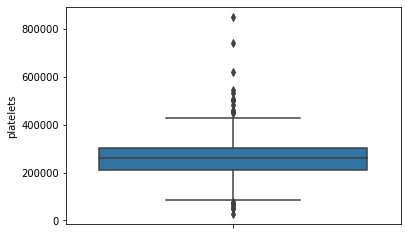

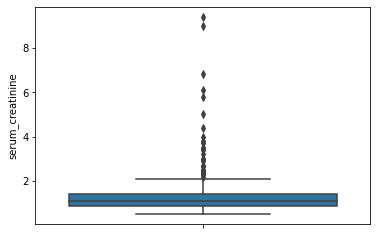

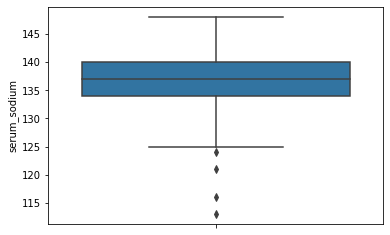

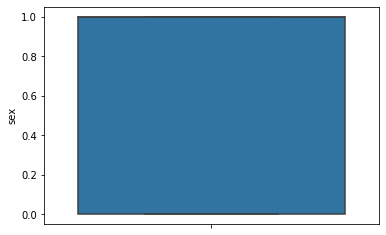

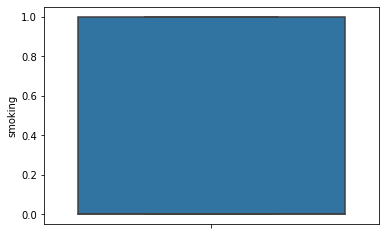

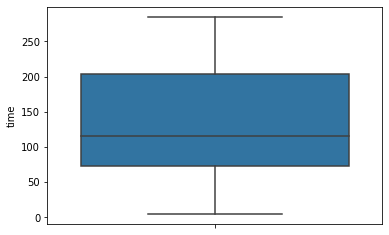

In [54]:
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(y=feature_names[i], data=df)

In [57]:
X = df.drop('DEATH_EVENT', axis = 1).values
y = df['DEATH_EVENT'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [59]:
grid_params = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,10,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, grid_params, cv = 3)
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [60]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training: ", accuracy_knn_train)
y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)
print('Accuracy is : ')
print(classifier_knn.best_params_)

Training:  1.0
Test set:  0.7066666666666667
Accuracy is : 
{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 10, 'model__p': 1, 'model__weights': 'distance'}


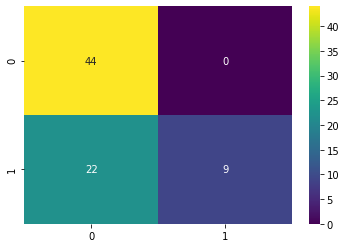

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        44
           1       1.00      0.29      0.45        31

    accuracy                           0.71        75
   macro avg       0.83      0.65      0.62        75
weighted avg       0.80      0.71      0.66        75



In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_knn_test))

In [62]:
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_pipe = Pipeline(steps)

In [63]:
grid_params = { 'model__kernel' : ['linear','rbf'],
               'model__C' : [1,10,100,1000,10000],
               'model__random_state' : [42],
               'model__gamma' : ['scale','auto']
}
classifier_svm = GridSearchCV(svm_pipe, grid_params, cv = 3)
classifier_svm = classifier_svm.fit(X_train, y_train.ravel())

In [64]:
y_pred_svm_train = classifier_svm.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print("Training set: ", accuracy_svm_train)
y_pred_svm_test = classifier_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("Test set: ", accuracy_svm_test)

Training set:  0.8883928571428571
Test set:  0.7866666666666666


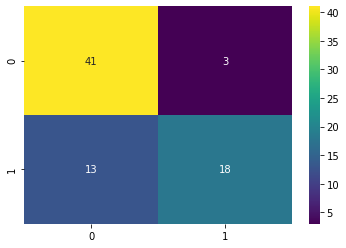

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        44
           1       0.86      0.58      0.69        31

    accuracy                           0.79        75
   macro avg       0.81      0.76      0.76        75
weighted avg       0.80      0.79      0.78        75

{'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'linear', 'model__random_state': 42}


In [65]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_svm_test))
print(classifier_svm.best_params_)

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [67]:
grid_params =  { "model__n_estimators": [100,200,500,600],
                "model__max_features": ["auto", "sqrt"],
                "model__max_depth":[10,20],
                "model__min_samples_split": [2, 5, 10],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }
            
classifier_rf = GridSearchCV(rf_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

In [68]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)
y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  0.9508928571428571
Test set:  0.7466666666666667


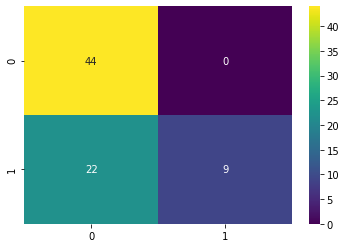

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        44
           1       1.00      0.29      0.45        31

    accuracy                           0.71        75
   macro avg       0.83      0.65      0.62        75
weighted avg       0.80      0.71      0.66        75

{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 10, 'model__p': 1, 'model__weights': 'distance'}


In [69]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_knn_test))
print(classifier_knn.best_params_)

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_gb = GradientBoostingClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', GradientBoostingClassifier())
]
gb_pipe = Pipeline(steps)

In [71]:
grid_params =  { "model__n_estimators": [100,200],
                "model__loss": ['deviance', 'exponential'],
                "model__learning_rate": [0.1],
                "model__max_features": ['auto', 'sqrt'],
                "model__criterion": ['friedman_mse', 'mse', 'mae'],
                "model__random_state": [42] }
            
classifier_gb = GridSearchCV(gb_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_gb = classifier_gb.fit(X_train, y_train.ravel())


In [72]:
y_pred_gb_train = classifier_gb.predict(X_train)
accuracy_gb_train = accuracy_score(y_train, y_pred_gb_train)
print("Training set: ", accuracy_gb_train)
y_pred_gb_test = classifier_gb.predict(X_test)
accuracy_gb_test = accuracy_score(y_test, y_pred_gb_test)
print("Test set: ", accuracy_gb_test)

Training set:  1.0
Test set:  0.72


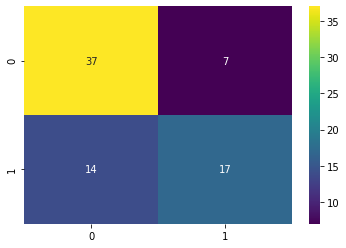

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        44
           1       0.71      0.55      0.62        31

    accuracy                           0.72        75
   macro avg       0.72      0.69      0.70        75
weighted avg       0.72      0.72      0.71        75

{'model__criterion': 'mse', 'model__learning_rate': 0.1, 'model__loss': 'deviance', 'model__max_features': 'auto', 'model__n_estimators': 100, 'model__random_state': 42}


In [73]:
sns.heatmap(confusion_matrix(y_test, y_pred_gb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_gb_test))
print(classifier_gb.best_params_)

In [74]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ab = AdaBoostClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', AdaBoostClassifier())
]
ab_pipe = Pipeline(steps)

In [75]:
grid_params =  { "model__algorithm": [ 'SAMME.R',  'SAMME'],
                "model__learning_rate":[0.5,1,2,3],
                "model__n_estimators": [50,100,150,200,300],
                "model__random_state" : [42] }

classifier_ab = GridSearchCV(ab_pipe, grid_params,cv = 3, n_jobs = -1)
classifier_ab = classifier_ab.fit(X_train, y_train.ravel())

In [76]:
from sklearn.metrics import accuracy_score
y_pred_ab_train = classifier_ab.predict(X_train)
accuracy_ab_train = accuracy_score(y_train, y_pred_ab_train)
print("Training set: ", accuracy_ab_train)
y_pred_ab_test = classifier_ab.predict(X_test)
accuracy_ab_test = accuracy_score(y_test, y_pred_ab_test)
print("Test set: ", accuracy_ab_test)

Training set:  0.96875
Test set:  0.72


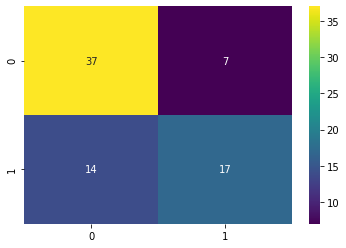

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        44
           1       0.71      0.55      0.62        31

    accuracy                           0.72        75
   macro avg       0.72      0.69      0.70        75
weighted avg       0.72      0.72      0.71        75

{'model__algorithm': 'SAMME', 'model__learning_rate': 1, 'model__n_estimators': 100, 'model__random_state': 42}


In [77]:
sns.heatmap(confusion_matrix(y_test, y_pred_ab_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_ab_test))
print(classifier_ab.best_params_)

In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [79]:

grid_params = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(dt_pipe,grid_params,cv = 3,n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

In [80]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)
y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.8928571428571429
Test set:  0.68


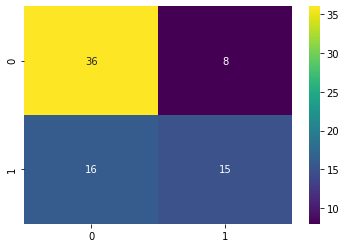

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        44
           1       0.65      0.48      0.56        31

    accuracy                           0.68        75
   macro avg       0.67      0.65      0.65        75
weighted avg       0.68      0.68      0.67        75

{'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2, 'model__random_state': 42}


In [81]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_dt_test))
print(classifier_dt.best_params_)

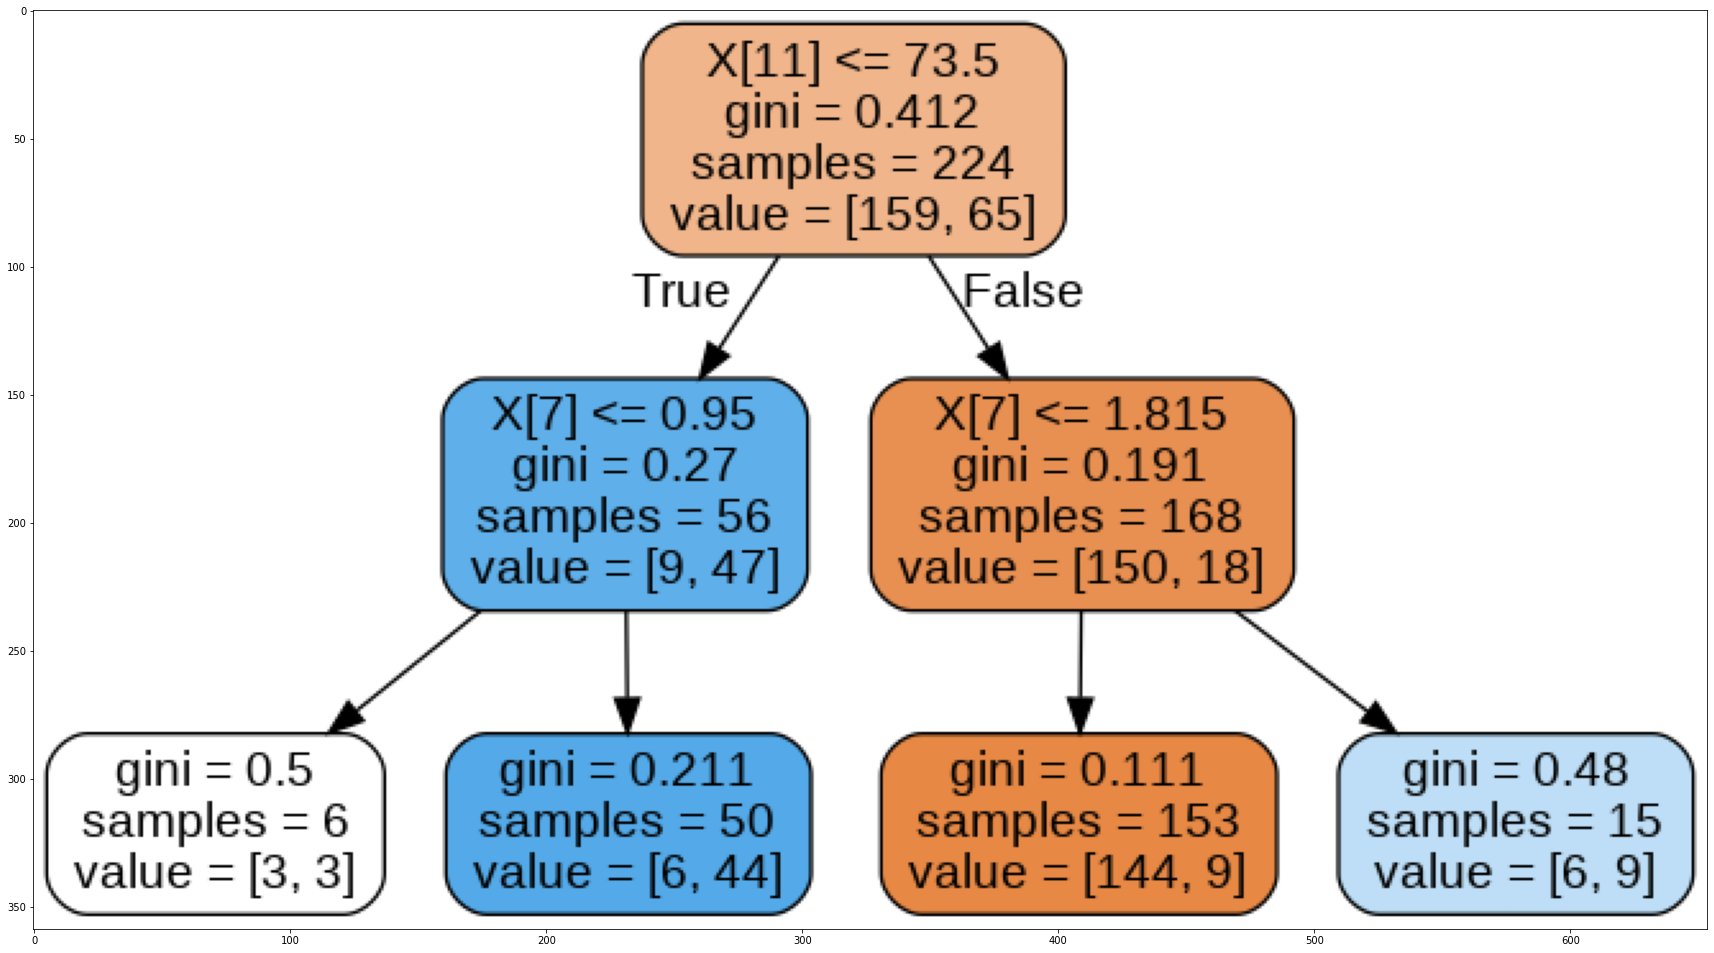

In [82]:
best_tree = classifier_dt.best_estimator_[1].fit(X_train, y_train.ravel())
dot_data = export_graphviz(best_tree, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')    
plt.figure(figsize=(30, 30)) 
plt.imshow(plt.imread('decision_tree.png'))